In [50]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [51]:
# 1. Concatenar os Dados
# Importação e concatenação de 6 planilhas
df_2201=pd.read_csv('/content/glp-2022-01.csv', sep=';')
df_2202=pd.read_csv('/content/glp-2022-02.csv', sep=';')
df_2301=pd.read_csv('/content/glp-2023-01.csv', sep=';')
df_2302=pd.read_csv('/content/glp-2023-02.csv', sep=';')
df_2401=pd.read_csv('/content/glp-2024-01.csv', sep=';')
df_2402=pd.read_csv('/content/glp-2024-02.csv', sep=';')

df_222324=pd.concat([df_2201,df_2202,df_2301,df_2302,df_2401,df_2402])
display(df_222324.head(700000))

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,SE,SP,SAO VICENTE,CONSIGAZ DISTRIBUIDORA DE GÁS LTDA.,01.597.589/0003-81,RUA MANOEL DE ABREU,790,QUADRA 108,CIDADE NAUTICA,11355-400,GLP,03/01/2022,"97,99",NaN,R$ / 13 kg,CONSIGAZ
1,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,NaN,AREAL,69906-119,GLP,03/01/2022,115,NaN,R$ / 13 kg,FOGAS
2,N,AC,RIO BRANCO,AUTO POSTO ACAUAN LTDA,00.524.999/0001-78,RODOVIA AC 40,1800,NaN,VILA ACRE,69902-450,GLP,03/01/2022,110,NaN,R$ / 13 kg,AMAZONGÁS
3,N,AC,RIO BRANCO,AUTO POSTO CANINDE LTDA,05.442.544/0001-27,RODOVIA AC 40,3206,KM 07,VILA ACRE,69902-450,GLP,03/01/2022,115,NaN,R$ / 13 kg,AMAZONGÁS
4,N,AC,RIO BRANCO,AUTO POSTO AEROPORTO LTDA,14.294.227/0001-00,V CHICO MENDES,2583,NaN,COMARA,69906-326,GLP,03/01/2022,115,NaN,R$ / 13 kg,AMAZONGÁS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38420,CO,MT,VARZEA GRANDE,EMPORIO ALM LTDA,39.592.620/0001-00,RODOVIA MARIO ANDREAZZA,605,NaN,PETROPOLIS,78144-850,GLP,31/12/2024,"115,00",NaN,R$ / 13 kg,COPA ENERGIA
38421,S,PR,PONTA GROSSA,CRISTIANE DO ROCIO MACHADO,45.869.547/0001-66,RUA ENIO DONÁ,70,NaN,CONTORNO,84060-579,GLP,31/12/2024,"105,00",NaN,R$ / 13 kg,ULTRAGAZ
38422,S,RS,SANTA MARIA,PEMATHUR COMBUSTIVEIS E CONVENIENCIAS LTDA,44.497.629/0001-64,AVENIDA BORGES DE MEDEIROS,2137,NaN,NOSSA SENHORA DE FATIMA,97015-090,GLP,31/12/2024,"105,00",NaN,R$ / 13 kg,ULTRAGAZ
38423,CO,MS,CAMPO GRANDE,AUTO POSTO FENNER LTDA,10.839.948/0003-50,AVENIDA JULIO DE CASTILHO,2501,NaN,VILA ALBA,79100-005,GLP,31/12/2024,"99,99",NaN,R$ / 13 kg,NACIONAL GÁS BUTANO


In [52]:
# 2. Tratar os Dados

# Tratamento de NaN
df_222324['Complemento'] = df_222324['Complemento'].fillna(0)
df_222324['Valor de Compra'] = df_222324['Valor de Compra'].fillna(0)

# Converter Data da Coleta para date
df_222324['Data da Coleta'] = pd.to_datetime(df_222324['Data da Coleta'], format='%d/%m/%Y')

#Converter valoor de venda para float
df_222324['Valor de Venda'] = df_222324['Valor de Venda'].str.replace(',', '.').astype(float)

display(df_222324.head(700000))

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,SE,SP,SAO VICENTE,CONSIGAZ DISTRIBUIDORA DE GÁS LTDA.,01.597.589/0003-81,RUA MANOEL DE ABREU,790,QUADRA 108,CIDADE NAUTICA,11355-400,GLP,2022-01-03,97.99,0.0,R$ / 13 kg,CONSIGAZ
1,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,0,AREAL,69906-119,GLP,2022-01-03,115.00,0.0,R$ / 13 kg,FOGAS
2,N,AC,RIO BRANCO,AUTO POSTO ACAUAN LTDA,00.524.999/0001-78,RODOVIA AC 40,1800,0,VILA ACRE,69902-450,GLP,2022-01-03,110.00,0.0,R$ / 13 kg,AMAZONGÁS
3,N,AC,RIO BRANCO,AUTO POSTO CANINDE LTDA,05.442.544/0001-27,RODOVIA AC 40,3206,KM 07,VILA ACRE,69902-450,GLP,2022-01-03,115.00,0.0,R$ / 13 kg,AMAZONGÁS
4,N,AC,RIO BRANCO,AUTO POSTO AEROPORTO LTDA,14.294.227/0001-00,V CHICO MENDES,2583,0,COMARA,69906-326,GLP,2022-01-03,115.00,0.0,R$ / 13 kg,AMAZONGÁS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38420,CO,MT,VARZEA GRANDE,EMPORIO ALM LTDA,39.592.620/0001-00,RODOVIA MARIO ANDREAZZA,605,0,PETROPOLIS,78144-850,GLP,2024-12-31,115.00,0.0,R$ / 13 kg,COPA ENERGIA
38421,S,PR,PONTA GROSSA,CRISTIANE DO ROCIO MACHADO,45.869.547/0001-66,RUA ENIO DONÁ,70,0,CONTORNO,84060-579,GLP,2024-12-31,105.00,0.0,R$ / 13 kg,ULTRAGAZ
38422,S,RS,SANTA MARIA,PEMATHUR COMBUSTIVEIS E CONVENIENCIAS LTDA,44.497.629/0001-64,AVENIDA BORGES DE MEDEIROS,2137,0,NOSSA SENHORA DE FATIMA,97015-090,GLP,2024-12-31,105.00,0.0,R$ / 13 kg,ULTRAGAZ
38423,CO,MS,CAMPO GRANDE,AUTO POSTO FENNER LTDA,10.839.948/0003-50,AVENIDA JULIO DE CASTILHO,2501,0,VILA ALBA,79100-005,GLP,2024-12-31,99.99,0.0,R$ / 13 kg,NACIONAL GÁS BUTANO


In [53]:
# 3. Separar por Ano
df_222324['Ano'] = df_222324['Data da Coleta'].dt.year
display(df_222324.head(700000))

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira,Ano
0,SE,SP,SAO VICENTE,CONSIGAZ DISTRIBUIDORA DE GÁS LTDA.,01.597.589/0003-81,RUA MANOEL DE ABREU,790,QUADRA 108,CIDADE NAUTICA,11355-400,GLP,2022-01-03,97.99,0.0,R$ / 13 kg,CONSIGAZ,2022
1,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,0,AREAL,69906-119,GLP,2022-01-03,115.00,0.0,R$ / 13 kg,FOGAS,2022
2,N,AC,RIO BRANCO,AUTO POSTO ACAUAN LTDA,00.524.999/0001-78,RODOVIA AC 40,1800,0,VILA ACRE,69902-450,GLP,2022-01-03,110.00,0.0,R$ / 13 kg,AMAZONGÁS,2022
3,N,AC,RIO BRANCO,AUTO POSTO CANINDE LTDA,05.442.544/0001-27,RODOVIA AC 40,3206,KM 07,VILA ACRE,69902-450,GLP,2022-01-03,115.00,0.0,R$ / 13 kg,AMAZONGÁS,2022
4,N,AC,RIO BRANCO,AUTO POSTO AEROPORTO LTDA,14.294.227/0001-00,V CHICO MENDES,2583,0,COMARA,69906-326,GLP,2022-01-03,115.00,0.0,R$ / 13 kg,AMAZONGÁS,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38420,CO,MT,VARZEA GRANDE,EMPORIO ALM LTDA,39.592.620/0001-00,RODOVIA MARIO ANDREAZZA,605,0,PETROPOLIS,78144-850,GLP,2024-12-31,115.00,0.0,R$ / 13 kg,COPA ENERGIA,2024
38421,S,PR,PONTA GROSSA,CRISTIANE DO ROCIO MACHADO,45.869.547/0001-66,RUA ENIO DONÁ,70,0,CONTORNO,84060-579,GLP,2024-12-31,105.00,0.0,R$ / 13 kg,ULTRAGAZ,2024
38422,S,RS,SANTA MARIA,PEMATHUR COMBUSTIVEIS E CONVENIENCIAS LTDA,44.497.629/0001-64,AVENIDA BORGES DE MEDEIROS,2137,0,NOSSA SENHORA DE FATIMA,97015-090,GLP,2024-12-31,105.00,0.0,R$ / 13 kg,ULTRAGAZ,2024
38423,CO,MS,CAMPO GRANDE,AUTO POSTO FENNER LTDA,10.839.948/0003-50,AVENIDA JULIO DE CASTILHO,2501,0,VILA ALBA,79100-005,GLP,2024-12-31,99.99,0.0,R$ / 13 kg,NACIONAL GÁS BUTANO,2024


In [54]:
# 4. Cálculos Estatísticos
media = sum(df_222324['Valor de Venda'])/len(df_222324['Valor de Venda'])
mediana = df_222324['Valor de Venda'].median()
desvio_padrao = df_222324['Valor de Venda'].std()
maximo = df_222324['Valor de Venda'].max()
minimo = df_222324['Valor de Venda'].min()

print('Média: R$',round(media,2))
print('Mediana: R$',round(mediana,2))
print('Desvio Padrão: R$',round(desvio_padrao,2))
print('Maior Valor de Venda: R$',round(maximo,2))
print('Menor Valor de Venda: R$',round(minimo,2))

Média: R$ 106.37
Mediana: R$ 105.0
Desvio Padrão: R$ 12.4
Maior Valor de Venda: R$ 160.0
Menor Valor de Venda: R$ 65.0


,Preço Médio (R$),Variação (%)
Ano/Mês,,
2022/01,103.55,NaN
2022/02,103.48,-0.07
2022/03,110.56,6.85
2022/04,114.48,3.54
2022/05,113.78,-0.61
2022/06,113.54,-0.21
2022/07,112.91,-0.56
2022/08,112.28,-0.56
2022/09,113.16,0.79


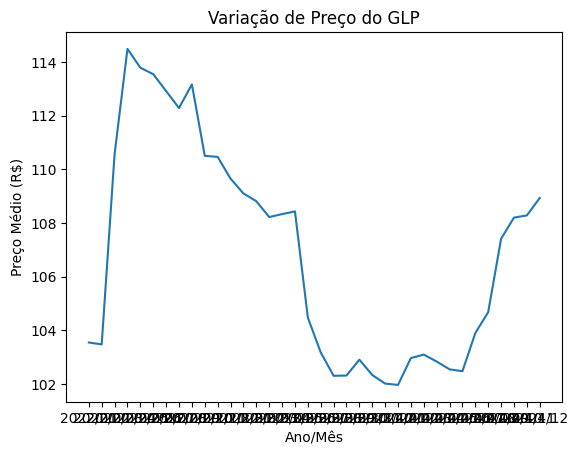

In [101]:
# 5. Variação do Preço do GLP

df_222324['Mês'] = df_222324['Data da Coleta'].dt.month.astype(str).str.zfill(2)
#df_222324['Ano'] = df_222324['Data da Coleta'].dt.year # 'Ano' is already created in step 3
df_222324['Ano/Mês'] = df_222324['Ano'].astype(str) + '/' + df_222324['Mês'].astype(str)

# indexaçao media de preço mensal ano/mes
mean_price_by_month_year = df_222324.groupby('Ano/Mês')['Valor de Venda'].mean()

variacao = {
    'Preço Médio (R$)': round(mean_price_by_month_year, 2), # valor de venda medio mensal
    'Variação (%)': round(mean_price_by_month_year.pct_change() * 100, 2) # variação percentual mensal
}

df_variacao = pd.DataFrame(variacao)
display(df_variacao.head(36))

#Gráfico indexado
plt.title('Variação de Preço do GLP')
plt.xlabel('Ano/Mês')
plt.ylabel('Preço Médio (R$)')
plt.plot(df_variacao.index, df_variacao['Preço Médio (R$)'])
plt.show()

In [96]:
# 6. Em que Momento Ele Oscilou
minimoP = df_variacao['Variação (%)'].min()
maximoP = df_variacao['Variação (%)'].max()
print('Menor Variação: ' + str(minimoP) + '%')
print('Maior Variação: ' + str (maximoP) + '%')

#Estes métodos acima foram excolhidos para seber as variações percentuais máxima e mínimA

Menor Variação: -3.64%
Maior Variação: 6.85%


,Região,Preço Médio (R$),Preço Mínimo (R$),Preço Máximo (R$),Desvio Padrão (R$)
Regiao - Sigla,,,,,
CO,Centro-Oeste,110.08,69.99,160.0,13.60
N,Norte,118.58,70.00,160.0,11.08
NE,Nordeste,103.89,65.00,150.0,11.24
S,Sul,107.62,67.00,160.0,11.19
SE,Sudeste,102.93,67.99,150.0,11.05


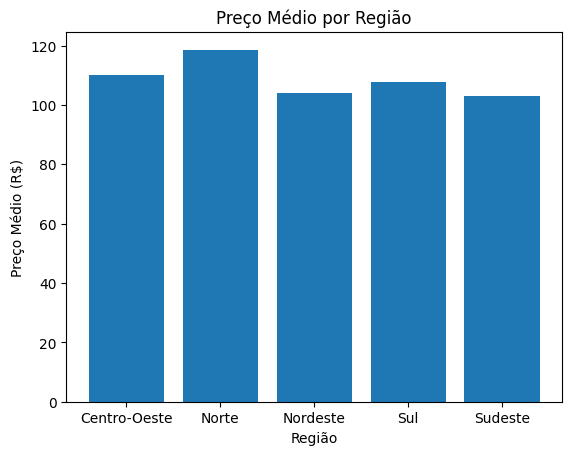

In [77]:
# 7. Destacar os Dados por Região
# indexar valor de venda  por regiao
rv = df_222324.groupby('Regiao - Sigla')['Valor de Venda']

regiao = {
    'Região': ['Centro-Oeste', 'Norte', 'Nordeste', 'Sul', 'Sudeste'],
    'Preço Médio (R$)': round(rv.mean(),2),
    'Preço Mínimo (R$)': round(rv.min(),2),
    'Preço Máximo (R$)': round(rv.max(),2),
    'Desvio Padrão (R$)': round(rv.std(),2)
}
df_regiao = pd.DataFrame(regiao)
display(df_regiao.head(5))

#Gráfico indexado em barras
plt.title('Preço Médio por Região')
plt.xlabel('Região')
plt.ylabel('Preço Médio (R$)')
plt.bar(df_regiao['Região'], df_regiao['Preço Médio (R$)'])
plt.show()

In [ ]:
# 8. Momentos em que o Preço foi Afetado
''' O Percentual maior de variação foi 6,85% em Março de 2022. E o menor foi de -3,64% em Junho de 2023.
As maiores altas foram entre Março e Abril de 2022. Já as maiores baixas, entre Maio de 2022 e Junho de 2024. E a recuperação do aumento a partir de Julho de 2024.
Em média, o preço do botijão do gás é maior na Região Norte e Menor na Região Nordeste, devido à proximidade com as plataformas de petróleo marítima.
'''